In [2]:
def clean_text(text):
    #remove code blocks, urls, HTML code, special characters
    import re

    #code blocks (text between code tag)
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    
    #urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<a.*?</a>', '', text)

    #other HTML tag
    text = re.sub(r'<.*?>', '', text)
    
    #special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    #lowercase
    text = text.lower()
    
    return text

how do i create my own training corpus for stanford tagger i have to analyze informal english text with lots of short hands and local lingo hence i was thinking of creating the model for the stanford tagger

how do i create my own set of labelled corpus for the stanford tagger to train on

what is the syntax of the corpus and how long should my corpus be in order to achieve a desirable performance
 to train the pos tagger see  which is also included in the  for the maxenttagger class

the javadocs for the  specifies the training format


  the training file should be in the
  following format one word and one tag
  per line separated by a space or a
  tab each sentence should end in an
  eos wordtag pair actually im not
  entirely sure that is still the case
  but it probably wont hurt wmorgan https://stackoverflow.com/questions/3156256/how-do-i-create-my-own-training-corpus-for-stanford-tagger


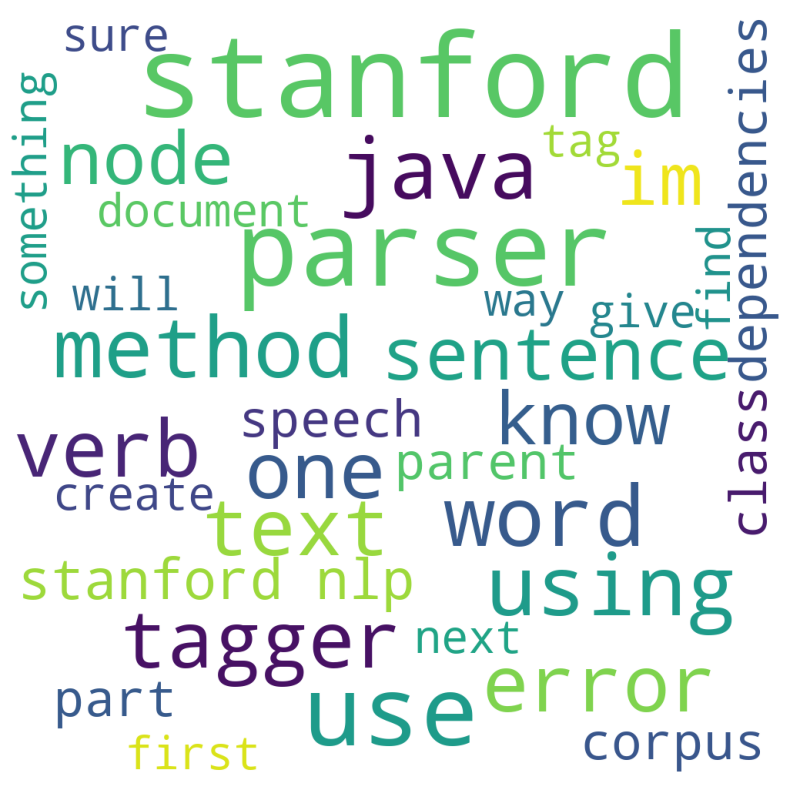

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from collections import Counter

df = pd.read_csv('questions_data_stanford_nlp.csv', 
                 header=None,
                 names=["Title", "Description", "Tags", "Accepted Answer", "Answer Score", 
                        "Question Score", "Question Views", "Creation Time", "Link"])

df['Text_Only'] = ['']*len(df)

for i,row in enumerate(df):
    df.at[i,'Text_Only']=clean_text(df.iloc[i]['Title'] + " " + df.iloc[i]['Description'] + " " + df.iloc[i]['Accepted Answer']).strip()

#print an example
print(df.iloc[i]['Text_Only'],df.iloc[i]['Link'])

all_text=' '.join(df['Text_Only'])

#stop words?

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    max_words=40,
    min_font_size=50,
    max_font_size=150,
    random_state=42
).generate(all_text)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


